# Project 4: Wrangling

#### Gathering data from WeRateDogs, cleaning it, then making analysis and visualizations.

### Gathering Data

1. Load the twitter archieve csv file
2. Download the image predictions file
3. Use twitter API, tweepy, to download other required data, such as: retweet count and favourite(like) count.

In [2]:
#Getting required packages
import pandas as pd
import requests

In [3]:
#load twitter archive csv file
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
#Download required file and save it
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
open('image-predictions.tsv','wb').write(r.content)

335079

In [6]:
#Create the dataframe from the downloaded file
image_pred = pd.read_csv('image-predictions.tsv',sep='\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Twitter Section
Here I authenticate my twitter application

In [7]:
import tweepy

consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit =True,wait_on_rate_limit_notify =True)

In [8]:
#Use this to be able to print any error
import sys
import json

In [10]:
#For each tweet_id, try to get the tweet info with get_status
#Then append the tweet info to the text file.
for _id in tw_archive.tweet_id:
    try:
        tweet = api.get_status(_id, tweet_mode='extended')
        print(_id)
        with open('tweet_json.txt','a+') as tweets_file:
            
            tweets_file.seek(0)
            # If file is not empty then append '\n'
            data = tweets_file.read(100)
            if len(data) > 0 :
                tweets_file.write("\n")
            tweets_file.write(json.dumps(tweet._json))
    except:
        e = sys.exc_info()[0]
        print('tweet not found')
        print(e)
    

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
tweet not found
<class 'tweepy.error.TweepError'>
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560


823719002937630720
823699002998870016
823581115634085888
823333489516937216
823322678127919110
823269594223824897
822975315408461824
822872901745569793
822859134160621569
822647212903690241
822610361945911296
822489057087389700
822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860

768970937022709760
768909767477751808
768855141948723200
768609597686943744
768596291618299904
768554158521745409
768473857036525572
768193404517830656
767884188863397888
767754930266464257
767500508068192258
767191397493538821
767122157629476866
766864461642756096
766793450729734144
766714921925144576
766693177336135680
766423258543644672
766313316352462849
766078092750233600
766069199026450432
766008592277377025
765719909049503744
765669560888528897
765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865

Rate limit reached. Sleeping for: 261


758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
tweet not found
<class 'tweepy.error.TweepError'>
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
752173152931807232


705786532653883392
705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249

678708137298427904
678675843183484930
678643457146150913
678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944
677187300187611136


Rate limit reached. Sleeping for: 250


676975532580409345
676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956750848
675707330206

668237644992782336
668226093875376128
668221241640230912
668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547

In [9]:
tweet_info = []

In [10]:
with open('tweet_json.txt','r') as tw_file:
    for cnt, line in enumerate(tw_file):
        json_object = json.loads(line)
        #Make sure it's not a retweet
        if(json_object['retweeted'] == True):
            continue
        _id = json_object['id']
        retweet_count = json_object['retweet_count']
        favorite_count = json_object['favorite_count']
        expanded_url = None
        
        if('media' in json_object['entities']):
            expanded_url = json_object['entities']['media'][0]['expanded_url']
        elif('urls' in json_object['entities'] and len(json_object['entities']['urls']) > 0):
            expanded_url = json_object['entities']['urls'][0]['expanded_url']
            
        tweet_info.append({
            'tweet_id':_id,
            'retweet_count':retweet_count,
            'favorite_count':favorite_count,
            'expanded_url': expanded_url
        })
tweet_info = pd.DataFrame(tweet_info)

In [11]:
tweet_info

,tweet_id,retweet_count,favorite_count,expanded_url
0,892420643555336193,7783,36542,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,5763,31481,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,3816,23730,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,7953,39872,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,8583,38068,https://twitter.com/dog_rates/status/891327558...
...,...,...,...,...
2325,666049248165822465,41,99,https://twitter.com/dog_rates/status/666049248...
2326,666044226329800704,133,274,https://twitter.com/dog_rates/status/666044226...
2327,666033412701032449,41,114,https://twitter.com/dog_rates/status/666033412...
2328,666029285002620928,42,121,https://twitter.com/dog_rates/status/666029285...


# Assess

In [12]:
tw_archive.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1464,694356675654983680,6.706684e+17,4.196984e+09,2016-02-02 03:08:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper only appears through the hole of a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694356675...,10,10,None,None,None,pupper,None
950,752173152931807232,NaN,NaN,2016-07-10 16:10:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. He's a lifeguard. Always prepar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752173152...,12,10,Brody,None,None,None,None
584,800141422401830912,NaN,NaN,2016-11-20 00:59:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Peaches. She's the ultimate selfie sid...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800141422...,13,10,Peaches,None,None,None,None
1925,674063288070742018,NaN,NaN,2015-12-08 03:09:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. Earl is lost. Someone help Earl....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674063288...,5,10,Earl,None,None,None,None
515,811386762094317568,NaN,NaN,2016-12-21 01:44:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Craig. That's actually a normal sized ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811386762...,11,10,Craig,None,None,pupper,None
1921,674262580978937856,NaN,NaN,2015-12-08 16:21:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's super stoked about being an ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674262580...,9,10,Gus,None,None,pupper,None
1716,680206703334408192,NaN,NaN,2015-12-25 02:01:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope everyone enjoys this picture as much as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680206703...,12,10,Toby,None,None,None,None
987,749036806121881602,NaN,NaN,2016-07-02 00:27:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dietrich. He hops at random. Other dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749036806...,8,10,Dietrich,None,None,None,None
1710,680583894916304897,NaN,NaN,2015-12-26 03:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. Her tennis ball slowly rolled d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680583894...,8,10,Penny,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None


In [13]:
#Checking some dogs with stages
tw_archive[tw_archive.doggo != 'None'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None


In [14]:
tw_archive[tw_archive.expanded_urls.isnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [15]:
tw_archive[tw_archive.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
not              2
mad              2
getting          2
actually         2
light            1
incredibly       1
my               1
unacceptable     1
officially       1
such             1
by               1
old              1
life             1
all              1
this             1
infuriating      1
space            1
his              1
Name: name, dtype: int64

In [16]:
tw_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
tw_archive[tw_archive.rating_denominator != 10].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None


In [392]:
tw_archive[tw_archive.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [21]:
#this seems to be a useless reply. No link. Check the text:
tw_archive.iloc[1598].text
#I should probably remove such replies tweets.

"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating"

In [22]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [390]:
image_pred.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1908,852672615818899456,https://pbs.twimg.com/media/C9VNNp1XkAEWRFb.jpg,1,golden_retriever,0.711235,True,otterhound,0.068235,True,Sussex_spaniel,0.046562,True
1672,813112105746448384,https://pbs.twimg.com/media/C0jBJZVWQAA2_-X.jpg,1,dingo,0.287369,False,Pembroke,0.140682,True,basenji,0.090819,True
288,671159727754231808,https://pbs.twimg.com/media/CVBwNjVWwAAlUFQ.jpg,1,pitcher,0.117446,False,sunglasses,0.062487,False,mask,0.059517,False
661,682429480204398592,https://pbs.twimg.com/media/CXh5_dDWQAIbU-J.jpg,1,whippet,0.594701,True,Italian_greyhound,0.314091,True,Mexican_hairless,0.037773,True
1472,779834332596887552,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,1,golden_retriever,0.993830,True,cocker_spaniel,0.003143,True,Great_Pyrenees,0.000917,True
532,676864501615042560,https://pbs.twimg.com/media/CWS0q8iU8AE2Srr.jpg,1,Chesapeake_Bay_retriever,0.371146,True,water_buffalo,0.099596,False,Weimaraner,0.048968,True
509,676101918813499392,https://pbs.twimg.com/media/CWH_FTgWIAAwOUy.jpg,1,Shih-Tzu,0.225848,True,Norfolk_terrier,0.186873,True,Irish_terrier,0.106987,True
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
1652,809808892968534016,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True
1530,789530877013393408,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,3,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True


In [25]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
tweet_info.sample(15)

,tweet_id,retweet_count,favorite_count,expanded_url
1023,743510151680958465,3750,7967,https://twitter.com/dog_rates/status/743510151...
2142,669354382627049472,1243,2630,https://twitter.com/dog_rates/status/669354382...
457,816336735214911488,2010,8836,https://twitter.com/dog_rates/status/816336735...
1012,744971049620602880,2712,7956,https://twitter.com/dog_rates/status/744971049...
471,814153002265309185,8955,29575,https://twitter.com/dog_rates/status/814153002...
1285,707059547140169728,677,2611,https://twitter.com/dog_rates/status/707059547...
2312,666104133288665088,6049,13782,https://twitter.com/dog_rates/status/666104133...
494,811985624773361665,1449,7473,https://twitter.com/dog_rates/status/811985624...
252,842163532590374912,5811,24579,https://twitter.com/dog_rates/status/842163532...
947,750101899009982464,855,3086,https://twitter.com/dog_rates/status/750101899...


In [26]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 4 columns):
tweet_id          2330 non-null int64
retweet_count     2330 non-null int64
favorite_count    2330 non-null int64
expanded_url      2196 non-null object
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [27]:
#Checking which users are replies to the most. that's probably the WeRateDogs twitter user
tw_archive.in_reply_to_user_id.value_counts()

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.916630e+07     1
3.105441e+09     1
2.918590e+08     1
2.792810e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
3.589728e+08     1
8.405479e+17     1
2.894131e+09     1
2.143566e+07     1
2.281182e+09     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id, dtype: int64

<a id="table"></a>

### Quality

#### tw_archive table
-  tweet_id,in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id and retweeted_status_user_id columns are either int64 or float64, they should be str
- Some dogs name aren't reasonable, such as: 'a', 'an', or 'the'
- None instead of NaN for name, doggo, floofer, pupper, puppo
- timestamp column contains 0000+ which is redundant
- source column has only 4 unique values, of which some data is redundant such as the tag "<a"
- timestamp and retweeted_status_timestamp should be of type datetime
- expanded_urls contains null values
- Some rating denominators aren't 10.
- Tweet with id '835246439529840640' has 0 for rating denominator
- Retweets should be removed
- Tweets that are replies to WeRateDogs should also be removed

#### image_pred table
- tweet_id should be of type str

#### tweet_info table
- tweet_id should be of type str
- Less rows than tw_archive table
- retweet_count and favorite_count are float for no beneficial reason

### Tidiness

- The columns retweet_count and favorite count from __tweet_info__ table should be in __tw_archive__ table
- In __tw_archive__ table, doggo, floofer, pupper and puppo dogs type should be made into one column


# Clean


I will do the tweet_id str type quality issues, then the tidiness issues, then continue the remaining quality issues.

But first, I need to copy the dataframes

In [436]:
tw_df_clean = tw_archive.copy()
image_pred_clean_df = image_pred.copy()
tweet_info_clean_df = tweet_info.copy()

### Ids columns type

#### Define
In tw_archive dataframe, convert these columns type to str: _tweet_id,in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id and retweeted_status_user_id_

I will not convert the retweeted_status_id and retweeted_status_user_id because I will remove them later

#### Code

In [437]:
#Use pd.Series to preserve nulls. (The reason it preserves them is because we use .values here)
tw_df_clean.tweet_id =                 pd.Series(tw_df_clean.tweet_id.values , dtype=str)
tw_df_clean.in_reply_to_status_id =    pd.Series(tw_df_clean.in_reply_to_status_id.values , dtype=str).str.replace('.0','')
tw_df_clean.in_reply_to_user_id =      pd.Series(tw_df_clean.in_reply_to_user_id.values , dtype=str).str.replace('.0','')

#### Test

In [438]:
tw_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(2), obj

In [439]:
tw_df_clean[tw_df_clean.in_reply_to_user_id.notnull()].sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558615844633518e+17,194351775,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
30,886267009285017600,8.8626635751283e+17,22811810,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


#### Define
In __image_pred__ and __tweet_info__ dataframes, convert _tweet_id_ column type to str

#### Code

In [440]:
image_pred_clean_df.tweet_id = pd.Series(image_pred_clean_df.tweet_id.values , dtype=str)
tweet_info_clean_df.tweet_id = pd.Series(tweet_info_clean_df.tweet_id.values , dtype=str)

#### Test

In [441]:
image_pred_clean_df.info(), tweet_info_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 4 columns):
tweet_id          2330 non-null object
retweet_count     2330 non-null int64
favorite_count    2330 non-null int64
expanded_url      2196 non-null object
dtypes: int64(2), object(2)
memory usage: 72.9+ KB


(None, None)

______

#### Define

_In tw_archive, None instead of NaN for name, doggo, floofer, pupper, puppo._  
For each None, set it to Nan

#### Code

In [442]:
tw_df_clean.name.replace('None', pd.np.nan, inplace=True)
tw_df_clean.doggo.replace('None', pd.np.nan, inplace=True)
tw_df_clean.floofer.replace('None', pd.np.nan, inplace=True)
tw_df_clean.pupper.replace('None', pd.np.nan, inplace=True)
tw_df_clean.puppo.replace('None', pd.np.nan, inplace=True)

#### Test

In [443]:
tw_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


______
#### Define

_**tweet_info table** has less rows than **tw_archive** table_

There are only 26 tweets that aren't available in tweet_info. This is Ok.  
The tweets which aren't available will get null values for columns retweet_count and favorite_count.  
Besides, I will probably remove a lot of tweets through this cleaning process.  
I will get back to this issue at last.

#### Code

In [444]:
tw_archive.shape[0] - tweet_info.shape[0]

26

______
### Tidiness
#### Define
_The columns retweet_count and favorite count from tweet_info table should be in tw_archive table._

Merge the two dataframes and assign the result as tw_df_clean final dataframe

#### Code

In [445]:
tw_df_clean = tw_df_clean.merge(tweet_info_clean_df, on='tweet_id',how='left')

#### Test

In [446]:
tw_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,expanded_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,7783.0,36542.0,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,5763.0,31481.0,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,3816.0,23730.0,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,7953.0,39872.0,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,8583.0,38068.0,https://twitter.com/dog_rates/status/891327558...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN,41.0,99.0,https://twitter.com/dog_rates/status/666049248...
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN,133.0,274.0,https://twitter.com/dog_rates/status/666044226...
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN,41.0,114.0,https://twitter.com/dog_rates/status/666033412...
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN,42.0,121.0,https://twitter.com/dog_rates/status/666029285...


______
#### Define
_In __tw_archive__ table, doggo, floofer, pupper and puppo dogs type should be made into one column_

Create dummies columns out of the columns provided.  
Replace each value with 1 and fill nan with 0.  
Then inverse the dummies and get the actual column from them.  
Comments below explain it.

#### Code

In [447]:
#Create dummies columns out of the columns provided. Replace each value with 1 and fill nan with 0
dummies = tw_df_clean[['doggo','floofer','pupper','puppo']].replace({'doggo':1,'floofer':1,'pupper':1,'puppo':1}).fillna(0)
#This sets the column None to 1 if there is no dog type (stage) specified (max = 0)
dummies['None'] = 1 - dummies.max(axis=1)
#Repalce zeros with Nans
dummies['None'].replace('None', pd.np.nan, inplace=True)
#Now do the magic, wherever there's 1, set it to the column name. 
#I created the None column so that I get None wherever no dog stage is set
tw_df_clean['stage'] = dummies.idxmax(axis=1)
tw_df_clean.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

#### Test

In [448]:
tw_df_clean.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,expanded_url,stage
1238,712097430750289920,NaN,NaN,2016-03-22 02:03:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't even comprehend how confused this dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712097430...,10,10,NaN,1037.0,3800.0,https://twitter.com/dog_rates/status/712097430...,None
248,845397057150107648,NaN,NaN,2017-03-24 22:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,NaN,NaN,NaN,"https://www.gofundme.com/help-save-a-pup,https...",13,10,Mimosa,1802.0,7647.0,https://twitter.com/dog_rates/status/845397057...,doggo
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,28951.0,87327.0,https://twitter.com/dog_rates/status/859196978...,None
1427,697630435728322560,NaN,NaN,2016-02-11 03:57:11 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Pls make sure ur dogs have gone through some b...,NaN,NaN,NaN,https://vine.co/v/in7ZzHPKzWz,8,10,NaN,545.0,1765.0,https://vine.co/v/in7ZzHPKzWz,None
1214,715200624753819648,NaN,NaN,2016-03-30 15:34:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Michelangelope. He's half coffee cup. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715200624...,12,10,Michelangelope,1888.0,5163.0,https://twitter.com/dog_rates/status/715200624...,None
1432,697482927769255936,NaN,NaN,2016-02-10 18:11:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Blipson. He's a Doowap Hufflepuff. That U...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697482927...,11,10,Blipson,677.0,2426.0,https://twitter.com/dog_rates/status/697482927...,None
81,877201837425926144,NaN,NaN,2017-06-20 16:29:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nelly. He graduated with his dogtorate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877201837...,12,10,Nelly,5168.0,25692.0,https://twitter.com/dog_rates/status/877201837...,None
2061,671166507850801152,NaN,NaN,2015-11-30 03:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herm. It's his first day of potty trai...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671166507...,10,10,Herm,335.0,851.0,https://twitter.com/dog_rates/status/671166507...,None
1981,672970152493887488,NaN,NaN,2015-12-05 02:46:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's having a hard time. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672970152...,7,10,Chet,347.0,928.0,https://twitter.com/dog_rates/status/672970152...,pupper
1378,701570477911896070,NaN,NaN,2016-02-22 00:53:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Yoda. He's a Zimbabwean Rutabaga. Frea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701570477...,9,10,Yoda,928.0,2836.0,https://twitter.com/dog_rates/status/701570477...,None


___
### Quality

#### Define
In tw_archive name column, some dogs name aren't reasonable, such as: 'a', 'an', or 'the'  
I noticed that all those wrong names are lowercase, so I will find every lowercase name and remove it.



#### Code

In [449]:
indexes = tw_df_clean[tw_df_clean.name.str.islower().fillna(False)].index
tw_df_clean.loc[indexes,'name'] = pd.np.nan

#### Test

In [450]:
tw_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,expanded_url,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7783.0,36542.0,https://twitter.com/dog_rates/status/892420643...,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5763.0,31481.0,https://twitter.com/dog_rates/status/892177421...,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3816.0,23730.0,https://twitter.com/dog_rates/status/891815181...,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,7953.0,39872.0,https://twitter.com/dog_rates/status/891689557...,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,8583.0,38068.0,https://twitter.com/dog_rates/status/891327558...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,41.0,99.0,https://twitter.com/dog_rates/status/666049248...,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,133.0,274.0,https://twitter.com/dog_rates/status/666044226...,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,41.0,114.0,https://twitter.com/dog_rates/status/666033412...,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,42.0,121.0,https://twitter.com/dog_rates/status/666029285...,None


______
#### Define
_Retweets should be removed_

Wherever the retweeted_status_id or retweeted_status_user_id are not null, remove these values.  
Then remove the two columns, as they become redundant

#### Code

In [451]:
indexes = tw_df_clean[tw_df_clean.retweeted_status_id.notnull()].index
tw_df_clean.drop(indexes,inplace=True)
tw_df_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)
#Reset index and don't add a new index column
tw_df_clean.reset_index(drop=True,inplace=True)

#### Test

In [452]:
#2356 - 181 = 2175
print(tw_df_clean.shape[0])
tw_df_clean.info()

2175
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
retweet_count            2167 non-null float64
favorite_count           2167 non-null float64
expanded_url             2109 non-null object
stage                    2175 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 238.0+ KB


______
#### Define

_Tweets that are replies but not from WeRateDogs should also be removed_

Remove any row where in_reply_to_user_id is equal to the WeRateDogs twitter user id, which is 4196983835.  
I checked that this is the Id [here](https://tweeterid.com/)
#### Code

In [453]:
indexes = tw_df_clean[tw_df_clean.in_reply_to_user_id == '4196983835'].index
tw_df_clean.drop(indexes,inplace=True)
#Reset index and don't add a new index column
tw_df_clean.reset_index(drop=True,inplace=True)

#### Test

In [454]:
tw_df_clean[tw_df_clean.in_reply_to_user_id == '4196983835']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,expanded_url,stage


In [455]:
tw_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 14 columns):
tweet_id                 2128 non-null object
in_reply_to_status_id    31 non-null object
in_reply_to_user_id      31 non-null object
timestamp                2128 non-null object
source                   2128 non-null object
text                     2128 non-null object
expanded_urls            2094 non-null object
rating_numerator         2128 non-null int64
rating_denominator       2128 non-null int64
name                     1390 non-null object
retweet_count            2120 non-null float64
favorite_count           2120 non-null float64
expanded_url             2086 non-null object
stage                    2128 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 232.9+ KB


______
#### Define
_timestamp column contains 0000+ which is redundant_

Upon checking, all rows actually have this redundant addition '+0000'.  
So I just need to remove it from all rows.


#### Code

In [456]:
#Making sure that all rows do contain the string +0000
tw_df_clean.shape[0] - tw_df_clean.timestamp.str.contains('\+0000').sum()

0

In [457]:
tw_df_clean.timestamp = tw_df_clean.timestamp.str.replace('\+0000','')

#### Test

In [458]:
tw_df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,expanded_url,stage
2021,667878741721415682,NaN,NaN,2015-11-21 01:34:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedrick. He lives on the edge. Needs s...,https://twitter.com/dog_rates/status/667878741...,2,10,Tedrick,114.0,380.0,https://twitter.com/dog_rates/status/667878741...,None
472,800018252395122689,NaN,NaN,2016-11-19 16:49:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo doin a struggle. 11/10 much det...,https://twitter.com/dog_rates/status/800018252...,11,10,NaN,13633.0,29254.0,https://twitter.com/dog_rates/status/800018252...,doggo
195,847962785489326080,NaN,NaN,2017-04-01 00:04:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,https://twitter.com/dog_rates/status/847962785...,10,10,Georgie,5050.0,23433.0,https://twitter.com/dog_rates/status/847962785...,None
2061,667176164155375616,NaN,NaN,2015-11-19 03:02:47,"<a href=""http://twitter.com/download/iphone"" r...",These are strange dogs. All have toupees. Long...,https://twitter.com/dog_rates/status/667176164...,4,10,NaN,438.0,585.0,https://twitter.com/dog_rates/status/667176164...,None
679,765395769549590528,NaN,NaN,2016-08-16 03:52:26,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13,10,NaN,3451.0,27044.0,https://twitter.com/dog_rates/status/765395769...,None
1956,668994913074286592,NaN,NaN,2015-11-24 03:29:51,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous pups here. Both have cute fake ho...,https://twitter.com/dog_rates/status/668994913...,5,10,NaN,222.0,430.0,https://twitter.com/dog_rates/status/668994913...,None
946,728035342121635841,NaN,NaN,2016-05-05 01:35:26,"<a href=""http://twitter.com/download/iphone"" r...",This is all I want in my life. 12/10 for super...,https://twitter.com/dog_rates/status/728035342...,12,10,NaN,1677.0,4595.0,https://twitter.com/dog_rates/status/728035342...,pupper
438,807010152071229440,NaN,NaN,2016-12-08 23:53:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Lennon. He's a Boopershnoop Pupperdoop...,https://twitter.com/dog_rates/status/807010152...,12,10,Lennon,3987.0,13449.0,https://twitter.com/dog_rates/status/807010152...,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,9220.0,45469.0,https://twitter.com/dog_rates/status/889665388...,puppo
1533,679462823135686656,NaN,NaN,2015-12-23 00:45:35,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hurley. He's the curly one. He hugs every...,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,18843.0,31739.0,https://twitter.com/dog_rates/status/679462823...,None


______
#### Define
_timestamp and retweeted_status_timestamp should be of type datetime_

I will only do this for timestamp since I removed retweeted_status_timestamp


#### Code

In [459]:
tw_df_clean.timestamp = pd.to_datetime(tw_df_clean.timestamp)

#### Test

In [460]:
tw_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 14 columns):
tweet_id                 2128 non-null object
in_reply_to_status_id    31 non-null object
in_reply_to_user_id      31 non-null object
timestamp                2128 non-null datetime64[ns]
source                   2128 non-null object
text                     2128 non-null object
expanded_urls            2094 non-null object
rating_numerator         2128 non-null int64
rating_denominator       2128 non-null int64
name                     1390 non-null object
retweet_count            2120 non-null float64
favorite_count           2120 non-null float64
expanded_url             2086 non-null object
stage                    2128 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 232.9+ KB


______
#### Define
_source column has only 4 unique values, of which some data is redundant such as the tag "<a"_

Remove the unnecessary tags, then convert the datatype to categorical.

#### Code

In [461]:
#Use regex expression to get the desired value inside the tags
#First, using ''>(.*)<'' will match the required value inside the tags, but will also match the '>' and '<'
#The lookbehind and lookahead remove them
tw_df_clean.source = tw_df_clean.source.str.extract(r'(?<=>)(.*)(?=<)')

In [462]:
tw_df_clean.source = tw_df_clean.source.astype('category')

#### Test

In [463]:
tw_df_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,expanded_url,stage
1823,671520732782923777,NaN,NaN,2015-12-01 02:46:33,Twitter for iPhone,Meet Alejandro. He's an extremely seductive pu...,https://twitter.com/dog_rates/status/671520732...,10,10,Alejandro,515.0,1360.0,https://twitter.com/dog_rates/status/671520732...,None
1837,671182547775299584,NaN,NaN,2015-11-30 04:22:44,Twitter for iPhone,This pup holds the secrets of the universe in ...,https://twitter.com/dog_rates/status/671182547...,12,10,NaN,329.0,1090.0,https://twitter.com/dog_rates/status/671182547...,None
170,854010172552949760,NaN,NaN,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,3084.0,15976.0,https://twitter.com/dog_rates/status/854010172...,doggo


In [464]:
#Checking the type
tw_df_clean.source.dtype

CategoricalDtype(categories=['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone',
                  'Vine - Make a Scene'],
                 ordered=False)

______
#### Define
_expanded_urls contains null values_

I will first extract all URLs from the tweet texts..  
Then there will still be as much nulls as there were in the original expanded_urls column.  
So I will drop all rows where expanded_urls is null.  
Then I will drop the expanded_url column that we got from the twitter API, because it also contains nulls, even more nulls than the original expanded_urls column



#### Code

In [465]:
### This extracts all the URLs from the tweet text. If there are still as much nulls, it means we can't get the lost urls anyway
tw_df_clean.text.str.extract(r'([https]+://[\w(\.|/)]+)').iloc[:,0].isnull().sum() == tw_df_clean.expanded_urls.isnull().sum()

True

In [466]:
#Checking the nulls of the URLs extracted from the tweet API. There are nulls here as well so we have no option of retrieving any URL
tw_df_clean.expanded_url.isnull().sum()

42

In [468]:
indexes = tw_df_clean[tw_df_clean.expanded_urls.isnull()].index
tw_df_clean.drop(indexes, inplace=True)
#Reset index and don't add a new index column
tw_df_clean.reset_index(drop=True,inplace=True)

In [469]:
tw_df_clean.drop(columns=['expanded_url'],inplace=True)

#### Test

In [472]:
tw_df_clean[tw_df_clean.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage


I realized after performing this step, that I'm left with 0 non-null replies tweets.  
Which means I can safely remove the reply columns:  
in_reply_to_status_id    , in_reply_to_user_id      


In [471]:
tw_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 13 columns):
tweet_id                 2094 non-null object
in_reply_to_status_id    0 non-null object
in_reply_to_user_id      0 non-null object
timestamp                2094 non-null datetime64[ns]
source                   2094 non-null category
text                     2094 non-null object
expanded_urls            2094 non-null object
rating_numerator         2094 non-null int64
rating_denominator       2094 non-null int64
name                     1390 non-null object
retweet_count            2086 non-null float64
favorite_count           2086 non-null float64
stage                    2094 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 198.7+ KB


In [474]:
tw_df_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'],inplace=True)

In [475]:
tw_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 11 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null category
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1390 non-null object
retweet_count         2086 non-null float64
favorite_count        2086 non-null float64
stage                 2094 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 166.0+ KB


______
#### Define
_Tweet with id '835246439529840640' has 0 for rating denominator_  
Find that tweet and set the rating_denominator for it to 10 


#### Code

In [476]:
tw_df_clean[tw_df_clean.tweet_id == '835246439529840640']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage


In [477]:
tw_df_clean[tw_df_clean.rating_denominator == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage


It seems I've dropped that tweet while dropping other rows - great!

______
#### Define
_Some rating denominators aren't 10_

I can set all these denominators to 10 straight away, but I would like to do something more fancy - I will calculate the percentage from 10, set it for the nominator, then set the denominator to 10


#### Code

In [478]:
not_10_indexes = tw_df_clean[tw_df_clean.rating_denominator != 10].index
#Calculate the percentage. 10 * num / denom. then round it toward 0 by converting the float to int
percentage = (10 * tw_df_clean.iloc[not_10_indexes].rating_numerator / tw_df_clean.iloc[not_10_indexes].rating_denominator).astype(int)
tw_df_clean.loc[not_10_indexes,'rating_numerator'] = percentage
tw_df_clean.loc[not_10_indexes,'rating_denominator'] = 10

#### Test

In [479]:
tw_df_clean.iloc[not_10_indexes]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
338,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,12,10,NaN,3315.0,12482.0,None
402,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",34,10,Sam,1480.0,5495.0,None
698,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,11,10,NaN,2254.0,4881.0,None
851,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,8,10,NaN,13393.0,35232.0,None
902,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,12,10,NaN,1273.0,3860.0,None
946,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,2,10,NaN,1566.0,4118.0,None
983,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,10,10,Bluebert,209.0,2382.0,None
1009,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,11,10,NaN,747.0,2857.0,None
1034,710658690886586372,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,10,10,NaN,564.0,2326.0,None
1054,709198395643068416,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,9,10,NaN,646.0,2441.0,None


______
#### Define
_retweet_count and favorite_count are float for no beneficial reason_

Convert the type of these columns to int.  
Use the nullable integer type: Int64


#### Code

In [480]:
tw_df_clean.retweet_count = tw_df_clean.retweet_count.astype('Int64')
tw_df_clean.favorite_count = tw_df_clean.favorite_count.astype('Int64')

#### Test

In [481]:
tw_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 11 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null category
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1390 non-null object
retweet_count         2086 non-null Int64
favorite_count        2086 non-null Int64
stage                 2094 non-null object
dtypes: Int64(2), category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 170.0+ KB


______
#### Define

_**tweet_info table** has less rows than **tw_archive** table_

Now that the dataframes have been merged, I can see that there are still some nulls in retweet_count and favorite_count columns.  
Those are because there were originally less rows in tweet_info than tw_archive.  
I have no option but dropping these rows.

#### Code

In [482]:
null_indexes = tw_df_clean[tw_df_clean.retweet_count.isnull()].index
tw_df_clean.drop(null_indexes,inplace=True)

#### Test

In [483]:
tw_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2093
Data columns (total 11 columns):
tweet_id              2086 non-null object
timestamp             2086 non-null datetime64[ns]
source                2086 non-null category
text                  2086 non-null object
expanded_urls         2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  1382 non-null object
retweet_count         2086 non-null Int64
favorite_count        2086 non-null Int64
stage                 2086 non-null object
dtypes: Int64(2), category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 185.6+ KB


[Table](#table)

## Storing Dataframes

Now, we have tw_df_clean dataframe, and image_pred_clean_df dataframe.

I will store the first one as twitter_archive_master.csv  
And the other one as image_predictions_clean.csv

In [484]:
tw_df_clean.to_csv('twitter_archive_master.csv',index=False)
image_pred_clean_df.to_csv('image_predictions_clean.csv',index=False)

# Analysis and Visualizations

I will do some analysis on the cleaned dataframes.

Let's first examine the numerical values in general.

In [485]:
tw_df_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2086.000000,2086.0,2086.000000,2086.000000
mean,11.692713,10.0,2553.544583,8442.594919
std,39.763642,0.0,4468.424316,12260.379844
min,0.000000,10.0,11.000000,72.000000
25%,10.000000,10.0,564.250000,1877.250000
50%,11.000000,10.0,1238.500000,3855.500000
75%,12.000000,10.0,2912.750000,10531.000000
max,1776.000000,10.0,78670.000000,157952.000000


##### Dogs Ratings
We can see that most dogs are rated between 10 and 12, with some going way down to 0 and others way up to an exaggerated 1776..
Yet, it's still the norm that ratings are around 11 (out of 10)

In [529]:
#The dog with the highest rating
tw_df_clean.query('rating_numerator > 1000')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage,year_month_ts
768,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,2487,5191,None,2016-07-01


##### Retweet and Favorite Count
Those vary quite a lot, due to having large values.  
Let's see which dog got the maximum retweet count:

In [528]:
tw_df_clean.query('retweet_count == 78670')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage,year_month_ts
823,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,78670,157952,doggo,2016-06-01


And for favorite count:

In [488]:
tw_df_clean.query('favorite_count == 157952')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
823,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,78670,157952,doggo


It's the same one, which is reasonable.  
Interestingly, while the rating numerator here is greater than the mean, there are lots of dogs with better ratings that don't have much retweets and favorite count.  

Let's see the least loved dog:

In [530]:
#Show image of that most loved dog
min = tw_df_clean.favorite_count.min()
tw_df_clean.query('favorite_count == @min')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage,year_month_ts
2077,666102155909144576,2015-11-16 03:55:04,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,NaN,11,72,None,2015-11-01


That's the _least_ loved dog with a rating of 11/10, not very far from the _most_ loved dog, with a rating 13/10.  
So maybe there isn't much of a relation between retweet_count and favorite_count and rating_numerator, but I have to do more analysis.


##### Retweet count vs Rating

In [490]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

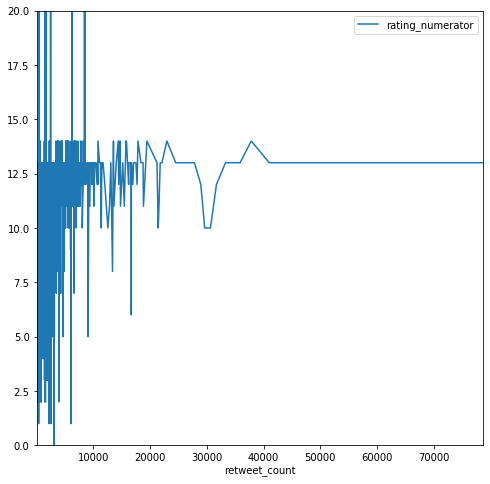

In [527]:
#Plot the retweet count along the x axis and rating along the y axis. Set a limit to see things better
tw_df_clean.sort_values(by=['retweet_count']).plot(x='retweet_count',y='rating_numerator',ylim=[0,20],figsize=(8,8))

It seems that there is a _weak positive relation_ between the retweet count and the rating for low tweet_count..  
However, as the count gets large, the rating settles around 12 it seems.
No meaningful relation can be inferred.

#####  Favorite count vs Rating

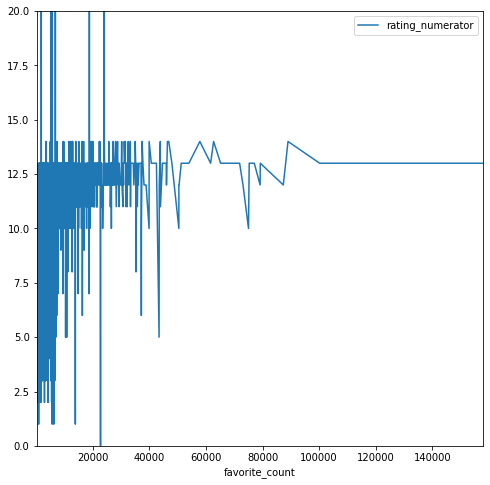

In [516]:
#Plot the retweet count along the x axis and rating along the y axis. Set a limit to see things better
tw_df_clean.sort_values(by=['favorite_count']).plot(x='favorite_count',y='rating_numerator',ylim=[0,20],figsize=(8,8))

Almost the same goes for favorite_count vs rating.   

We can only infer a generally positive relation between retweet_count and favorite_count themselves.

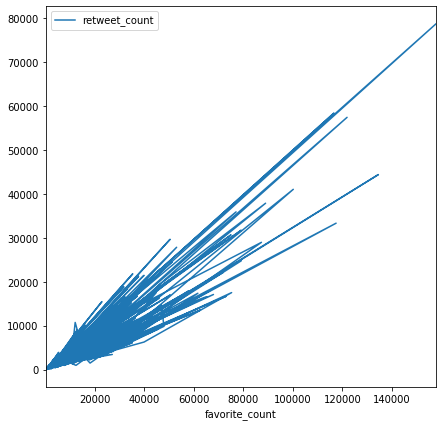

In [525]:
tw_df_clean.plot(x='favorite_count',y='retweet_count',figsize=(7,7))

Fascinating.

#### Statistics per dog stage

In [493]:
dog_stages = tw_df_clean.groupby('stage').mean()[['favorite_count','retweet_count','rating_numerator']]
dog_stages

,favorite_count,retweet_count,rating_numerator
stage,,,
None,8052.465183,2384.047945,11.795662
doggo,17465.365854,5969.000000,11.756098
floofer,10212.222222,3685.555556,11.888889
pupper,6786.754545,2224.072727,10.809091
puppo,21138.173913,5996.434783,12.000000


So most people actually prefer dogs at __puppo__ stage, this is evident in the highest favorite_count, at 20k, and the highest rating_numerator mean.  
This is followed by **doggo** then **floofer** then, surprisingly, **None**, which indicates that having a stage assigned for a dog isn't necessary for people to like it.  

One must note here that the proportional difference in _favorite_count_ isn't very similar to the rating between stages.  
In other words, while dogs without a stage have less _favorite_count_ mean than **duggos**, they still have _higher average rating_.

All in all, the most reliable measure is _favorite_count_ followed by _retweet_count_.  
To see this more clearly, I will plot it:

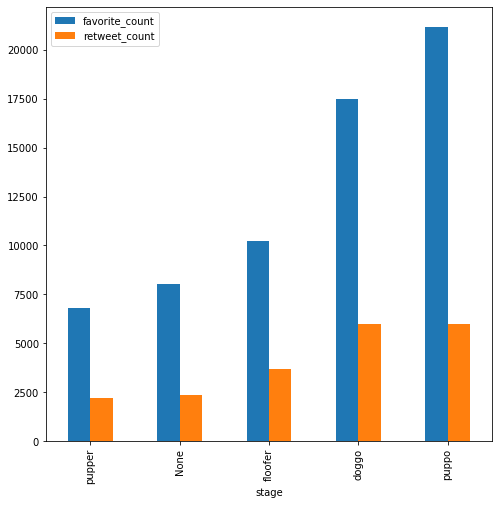

In [524]:
dog_stages[['favorite_count','retweet_count']].sort_values(by=['favorite_count']).plot(kind='bar',figsize=(8,8))

#### Time vs retweet, favorite, and rating

In [495]:
#Adding new column for visulization.
tw_df_clean['year_month_ts'] = tw_df_clean.timestamp.apply(lambda dt: dt.replace(day=1,hour=0,minute=0,second=0))

tw_df_clean.year_month_ts

0      2017-08-01
1      2017-08-01
2      2017-07-01
3      2017-07-01
4      2017-07-01
          ...    
2089   2015-11-01
2090   2015-11-01
2091   2015-11-01
2092   2015-11-01
2093   2015-11-01
Name: year_month_ts, Length: 2086, dtype: datetime64[ns]

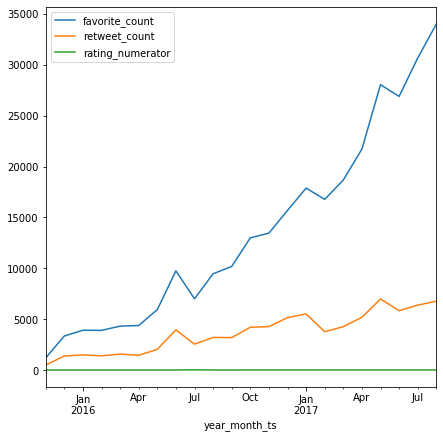

In [522]:
time_mean = tw_df_clean.groupby('year_month_ts').mean()[['favorite_count','retweet_count','rating_numerator']]
time_mean.plot(figsize=(7,7))

This shows that WeRateDogs is certainly becoming more famous, and not that dogs are becoming nicer.  
Because __rating_numerator__ mean almost stays constant, while __favorite_count__ is increasing.  
Which is logical anyway.

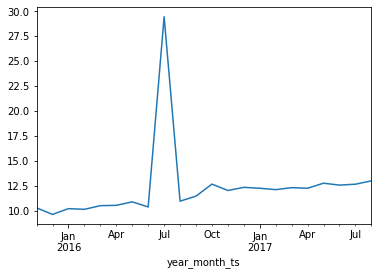

In [497]:
time_mean['rating_numerator'].plot()

That small peak around Jul is probably because of some exaggerated rating, as we have seen before.

This concludes the analysis and visulizations part.

_Had I not cleaned the datasets thoroughly, I wouldn't have been able to make a clear insight from the data.  
Especially that lots of tweets included were not of dogs, and they would have skewed the data otherwise._